In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.datasets import make_regression
from formulaic import Formula

import matplotlib.pyplot as plt


In [ ]:
# Si necesitan instalar algún paquete
#pip install gapminder
#!pip install formulaic

## Colinealidad y explosión de coeficientes

Para cada una de los conjuntos de datos $A$ y $B$, calcular los coeficientes de regresión por mínimos cuadrados al ajustar la variable $y$.

In [2]:
X_A = np.array([[1], [0.001], [0.001]])
X_B = np.array([[1, 1.001], [0.001, 0.001], [0.001, 0.001]])
y = np.array([1,0,0])
display(X_A)
display(X_B)
display(y)

array([[1.   ],
       [0.001],
       [0.001]])

array([[1.000e+00, 1.001e+00],
       [1.000e-03, 1.000e-03],
       [1.000e-03, 1.000e-03]])

array([1, 0, 0])

In [3]:
# Modelo A
modeloA = linear_model.LinearRegression(fit_intercept = False) 
modeloA.fit(X_A, y)
modeloA.coef_

array([0.999998])

In [4]:
# Modelo B
modeloA = linear_model.LinearRegression(fit_intercept = False) 
modeloA.fit(X_B, y)
modeloA.coef_

array([-1000.,  1000.])

# Mínimos cuadrados regularizados

Consideramos datos de los precios de viviendas en distintos barrios de Boston. Queremos predecir el precio en función de datos demográficos de cada barrio.

In [6]:
data = pd.read_csv("../datasets/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Primero, modelo lineal

In [20]:
# Consideramos primero un modelo lineal con todas las variables
formula = 'medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat + b'
y, X =  Formula(formula).get_model_matrix(data)

In [21]:
X

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,b
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,396.90
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,396.90
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,392.83
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,394.63
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,391.99
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,396.90
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,396.90
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,393.45


In [22]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [23]:
# Observación: y es una DataFrame (en realidad, una matriz de formulaic)
type(y)

formulaic.model_matrix.ModelMatrix

In [24]:
# Podemos convertirla a serie de Pandas con squeeze().
# Es conveniente para graficar o acceder a los valores de la serie
y = y.squeeze()
type(y)

pandas.core.series.Series

In [25]:
# Separamos en testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Inicializamos el modelo
modeloLineal = linear_model.LinearRegression(fit_intercept = False)  # alpha is the hyperparameter equivalent to lambda

# Entrenamos
modeloLineal.fit(X_train, y_train)

# Predecimos
y_pred = modeloLineal.predict(X_test)

# Evaluamos
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.5f}")

Root Mean Squared Error: 4.92860


Como tenemos datos poblaciones, puede ser útil considerar interacciones (productos entre variables).
Por ejemplo tiene sentido multiplicar cantidad de habitantes por salario promedio.

Sin pensarlo mucho ni mirar mucho las variables, incorporamos las interacciones entre las variables para ver si podemos mejorar el modelo.

In [27]:
# En Formulaic agregamos interacciones con el simbolo *.
# De esta forma se agregan las variables individuales y también los productos.
# Más sobre interaccciones en las próximas clases.
formula = 'medv ~ (crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)*(crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)-1'
y, X =  Formula(formula).get_model_matrix(data)
y = y.squeeze()
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,rad:tax,rad:ptratio,rad:lstat,rad:b,tax:ptratio,tax:lstat,tax:b,ptratio:lstat,ptratio:b,lstat:b
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,296,15.3,4.98,396.90,4528.8,1474.08,117482.40,76.194,6072.570,1976.5620
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,484,35.6,18.28,793.80,4307.6,2211.88,96049.80,162.692,7064.820,3627.6660
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,484,35.6,8.06,785.66,4307.6,975.26,95064.86,71.734,6992.374,1583.1049
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,666,56.1,8.82,1183.89,4151.4,652.68,87607.86,54.978,7379.581,1160.2122
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,666,56.1,15.99,1190.70,4151.4,1183.26,88111.80,99.671,7422.030,2115.4770


In [28]:
# Separamos en testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Inicializamos el modelo lineal
modeloLineal = linear_model.LinearRegression(fit_intercept = True)

# Entrenamos
modeloLineal.fit(X_train, y_train)

# Predecimos
y_pred = modeloLineal.predict(X_test)

# Evaluamos
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.5f}")

Root Mean Squared Error: 3.38172


Logramos una reducción importante del error cuadrático.

**Ejercicio:** Mirando los coeficientes con cuidado, seleccionar cuáles interacciones son importantes, y utilizar las técnicas vistas de selección de modelos, seleccionar un modelo lineal con pocas variables y similar poder explicativo.

Una forma rápida de mirar coeficientes es graficarlos.

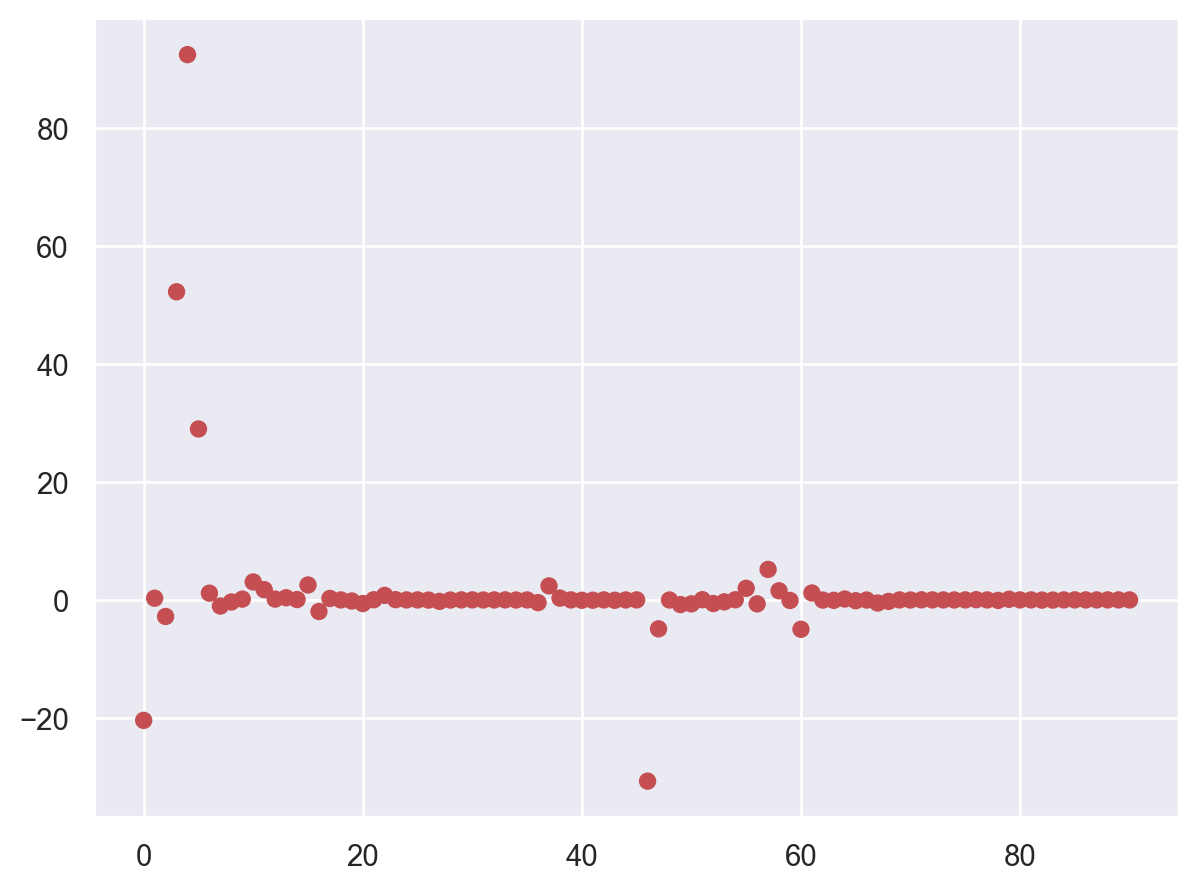

In [30]:
(
    so.Plot(x = np.arange(X.shape[1]))
    .add(so.Dot(color = "r"), y = modeloLineal.coef_)
)

In [31]:
modeloLineal.intercept_

np.float64(-210.21359286143945)

Al introducir tantas variables nuevas, relacionadas con las variables originales, es muy posible que hayamos introducido colinealidad entre las variables.

Es razonable entonces intentar un modelo de mínimos cuadrados regularizados.

# Regresión Ridge

**Paso 1:** Separamos los datos en entrenamiento y testeo.

In [32]:
# Separamos en testeo y entrenamiento
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [33]:
# Construimos las matrices X e y para entrenamiento
formula = 'medv ~ (crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)*(crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b) - 1'
y, X =  Formula(formula).get_model_matrix(df_train)
y = y.squeeze()

**Pregunta:** Que consideran más apropiado:
1. incluir el intecerpt como columna en los datos (y por lo tanto, incluir el coeficiente $\beta_0$ en la penalización de Ridge)
2. excluir el intecerpt como columna en los datos (y por lo tanto, excluir el coeficiente $\beta_0$ en la penalización de Ridge)

<details> <summary>Respuesta (click aquí)</summary>
En general debemos excluir el intercept de la penalización. De esta forma nos aseguramos que al tomar valores grandes de $\alpha$, el modelo se aproxime a la recta constante que mejor aproxima los datos.

Si incluimos $\beta_0$ en la penalidad, al tomar $\alpha$ grande, nuestro modelos se a aproxima a la recta $y=0$, que no aproxima los datos.
</details>

**Paso 2:** Definimos un vector de parámetros a probar

In [58]:
alphas = np.logspace(-3, 5, 30)
alphas

array([1.00000000e-03, 1.88739182e-03, 3.56224789e-03, 6.72335754e-03,
       1.26896100e-02, 2.39502662e-02, 4.52035366e-02, 8.53167852e-02,
       1.61026203e-01, 3.03919538e-01, 5.73615251e-01, 1.08263673e+00,
       2.04335972e+00, 3.85662042e+00, 7.27895384e+00, 1.37382380e+01,
       2.59294380e+01, 4.89390092e+01, 9.23670857e+01, 1.74332882e+02,
       3.29034456e+02, 6.21016942e+02, 1.17210230e+03, 2.21221629e+03,
       4.17531894e+03, 7.88046282e+03, 1.48735211e+04, 2.80721620e+04,
       5.29831691e+04, 1.00000000e+05])

**Pasos 3 y 4:** Para cada valor de alpha, calculamos el error promedio al realizar validación cruzada de 5 pliegos en los datos de entrenamiento.

In [59]:
# Comenzamos con un valor de alpha fijo
alpha = alphas[0]  # alpha = 0.01

cv = KFold(n_splits=5, random_state=42, shuffle=True)  # 5 pliegos

modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = True)    # Inicializamos un modelo de Regresion Lineal con intercept
rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X):
    X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
    modeloRidge.fit(X_train, y_train)
    
    y_pred = modeloRidge.predict(X_val)
    rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(f"Mean Squared Error: {rmse.mean():.2f}")

Mean Squared Error: 4.53


Esto lo hicimos para un solor valor de alpha, podemos hacerlo fácilmente para varios valores.

Para alfa = 0.00100 el Error Cuadrático Medio es : 4.68369
Para alfa = 0.00189 el Error Cuadrático Medio es : 4.67616
Para alfa = 0.00356 el Error Cuadrático Medio es : 4.66825
Para alfa = 0.00672 el Error Cuadrático Medio es : 4.65926
Para alfa = 0.01269 el Error Cuadrático Medio es : 4.64636
Para alfa = 0.02395 el Error Cuadrático Medio es : 4.62673
Para alfa = 0.04520 el Error Cuadrático Medio es : 4.60173
Para alfa = 0.08532 el Error Cuadrático Medio es : 4.57672
Para alfa = 0.16103 el Error Cuadrático Medio es : 4.55643
Para alfa = 0.30392 el Error Cuadrático Medio es : 4.54432
Para alfa = 0.57362 el Error Cuadrático Medio es : 4.54380
Para alfa = 1.08264 el Error Cuadrático Medio es : 4.55371
Para alfa = 2.04336 el Error Cuadrático Medio es : 4.56613
Para alfa = 3.85662 el Error Cuadrático Medio es : 4.57310
Para alfa = 7.27895 el Error Cuadrático Medio es : 4.57276
Para alfa = 13.73824 el Error Cuadrático Medio es : 4.56668
Para alfa = 25.92944 el Error Cuadrático Medio es : 4.5

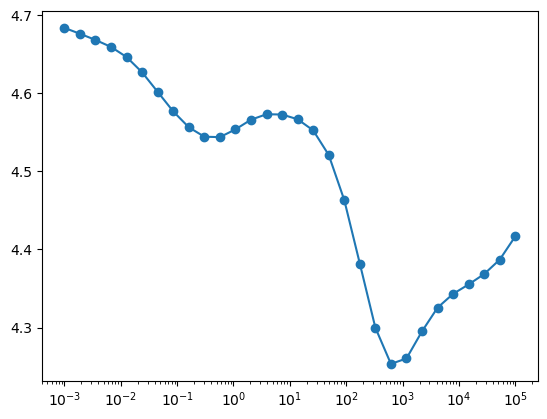

In [60]:
rr=[]
for alpha in alphas:
    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X):
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X_train, y_train)

        y_pred = modeloRidge.predict(X_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alfa = {alpha:.5f} el Error Cuadrático Medio es : {rmse.mean():.5f}")
    rr.append(rmse.mean())

plt.plot(alphas, rr)
plt.scatter(alphas,rr)
plt.xscale("log")
plt.show()

El valor óptimo es alpha = 0.5.
En base a los resultados observados agregamos algunos valores de alpha cercanos a 0.5.

In [61]:
alphas = np.array([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 3])
error_alphas = np.zeros(len(alphas))

for counter, alpha in enumerate(alphas):  # Truco para tener un contador al recorrer una lista
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X):
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X_train, y_train)

        y_pred = modeloRidge.predict(X_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alfa = {alpha:.5f} el Error Cuadrático Medio es : {rmse.mean():.5f}")
    error_alphas[counter] = rmse.mean()

Para alfa = 0.00100 el Error Cuadrático Medio es : 4.68369
Para alfa = 0.01000 el Error Cuadrático Medio es : 4.65189
Para alfa = 0.10000 el Error Cuadrático Medio es : 4.57107
Para alfa = 0.20000 el Error Cuadrático Medio es : 4.55118
Para alfa = 0.30000 el Error Cuadrático Medio es : 4.54446
Para alfa = 0.40000 el Error Cuadrático Medio es : 4.54256
Para alfa = 0.50000 el Error Cuadrático Medio es : 4.54287
Para alfa = 0.60000 el Error Cuadrático Medio es : 4.54422
Para alfa = 0.70000 el Error Cuadrático Medio es : 4.54605
Para alfa = 1.00000 el Error Cuadrático Medio es : 4.55213
Para alfa = 2.00000 el Error Cuadrático Medio es : 4.56577
Para alfa = 3.00000 el Error Cuadrático Medio es : 4.57126


Obtuvimos el valor más chico para $\alpha = 0.4$. 

Fijamos este valor y ajustamos el modelo usando todos los datos.

**Importante:** 
1. Los coeficientes de la regresión son **parámetros** y se recalculan utilizando todos los datos.
2. El coeficiente $\alpha$ es un **hiperparámetro**, queda fijo y no se recalcula.

In [63]:
alpha_optimo = 0.4

modeloRidge = linear_model.Ridge(alpha = alpha_optimo, fit_intercept = True)    # Inicializamos un modelo de Regresion Lineal sin intercept
modeloRidge.fit(X,y)

Ridge(alpha=0.4)

Probamos el modelo obtenido en los datos de testeo.

In [64]:
# Construimos las matrices X e y para testeo
formula = 'medv ~ (crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)*(crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+b)-1'
y_test, X_test =  Formula(formula).get_model_matrix(df_test)
        
y_pred = modeloRidge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"For alpha = {alpha_optimo:.5f} the Root Mean Squared Error is: {rmse.mean():.5f}")

For alpha = 0.40000 the Root Mean Squared Error is: 3.35602


Obtuvimos un error menor!

Podemos comparar los coeficientes gráficamente:

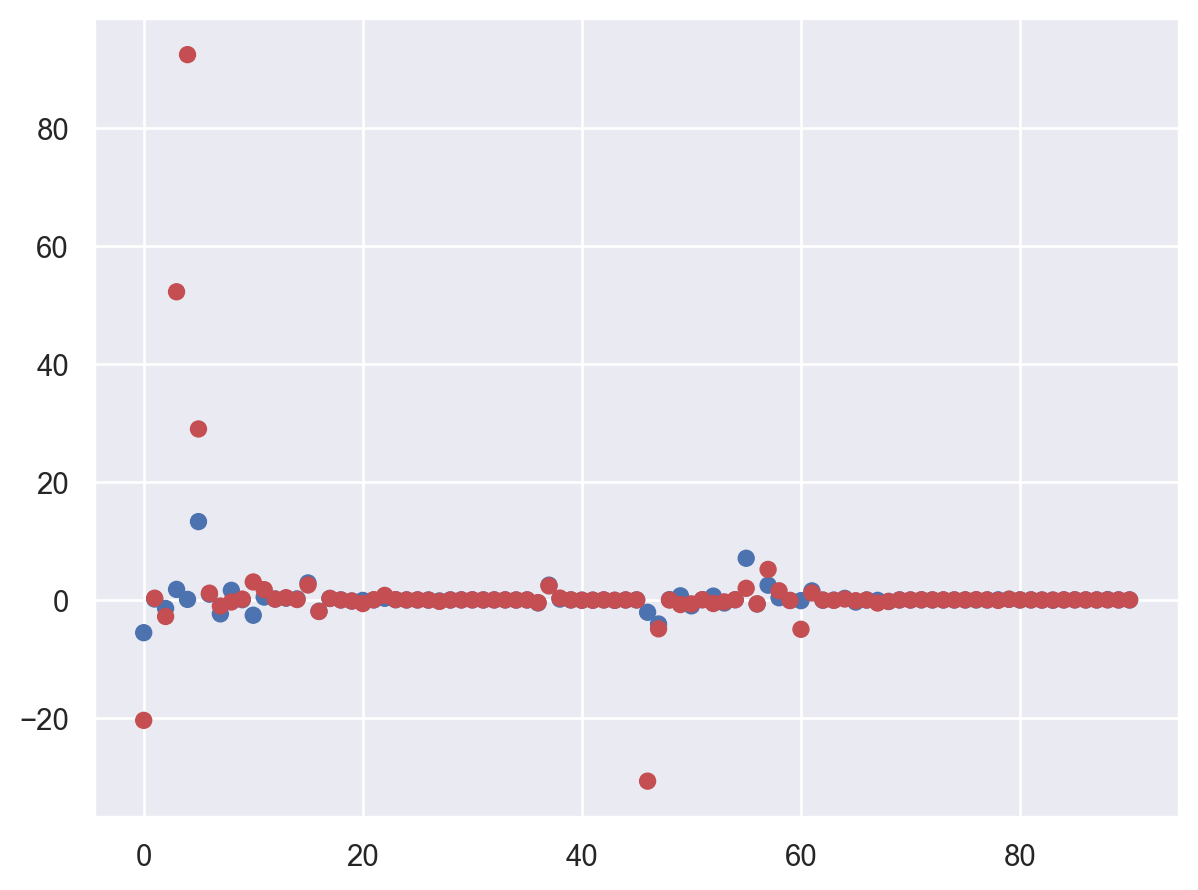

In [65]:
(
    so.Plot(x = np.arange(X.shape[1]))
    .add(so.Dot(color = "b"), y = modeloRidge.coef_)
    .add(so.Dot(color = "r"), y = modeloLineal.coef_)
)

In [ ]:
modeloLineal.intercept_

In [ ]:
modeloRidge.intercept_

Observamos que en los coeficientes del modelo lineal hay valores positivos altos que parecen cancelarse con valores negativos altos. Esto suele indicar colinealidad en las variables. Al hacer regresión Ridge, reducimos los problemas de la colinealidad

### Curva de errores 
Puede ser instructivo graficar el error en función de alfa.

In [ ]:
(
    so.Plot(x = ???, y = ???)
    .add(so.Dot(color = "b"))
)

**Preguntas:**
1. Qué pasa si la curva es decreciente?
2. Qué pasa si la curva es creciente?
3. Qué pasa si alpha = 0?

# Regresión ridge y escalamiento de las variables

Ya vimos que el escalamiento de variables nos puede servir en el modelo lineal para comparar coeficientes del modelo y deducir apropiadamente el peso de cada variable en el modelo.

Sin embargo, el escalamiento no afecta la bondad del modelo. El modelo lineal es invariante por escalamientos lineales de variables.

¿Qué pasa en regresión Ridge? ¿Será invariante por escalamiento de variables?

<details> <summary>Respuesta (click aquí)</summary>
Regresión Ridge NO es invariante por escalamiento. Si algunas variable está en una escala muy alta (por ejemplo medida en pesos) comparada con otras variables (por ejemplo medidas en dólares), el resultado será que las variables en dolares sean más penalizadas que las variables en pesos (porque tendrían en general coeficientes mayores).
</details>

## Caso de estudio: Jugadores de basketball universitario

In [ ]:
basketball = pd.read_csv("../Datos/CollegeBasketballPlayers2009-2021.csv")
basketball

In [ ]:
basketball.info()

In [ ]:
# Nos quedamos solo con las variables numéricas
basketNumeric = basketball.select_dtypes(include='number')

### Limpieza de datos: datos faltantes
Veamos cuántos datos faltantes hay por columna

In [ ]:
with pd.option_context('display.max_rows', None): 
    print(basketball.isna().sum())  # Cantidad de datos faltantes por columna

In [ ]:
# Eliminamos primero las columnas con más de 100 datos faltantes
nan_cols = basketNumeric.isna().sum() > 100  # Vector booleano
keep = nan_cols.index[~(nan_cols)] # Lista con los nombres de las columnas para dejar
basketNumeric = basketNumeric[keep] # Seleccionamos solo las columnas en keep

In [ ]:
# Verificamos ahora cuantos datos faltantes hay por columna
basketNumeric.isna().sum()

In [ ]:
# Ahora eliminamos todas las filas con datos faltantes
basketNumericClean = basketNumeric.dropna()
basketNumericClean

Ajutamos primero un modelo lineal sobre todos los datos para predecir la variable pts en función del resto.

In [ ]:
y = basketNumericClean["pts"]

In [ ]:
X = basketNumericClean.drop(["pts"], axis = 1)

In [ ]:
# Inicializamos el modelo lineal
modeloLineal = linear_model.LinearRegression() 

# Entrenamiento
modeloLineal.fit(X, y)

# Predicciones
y_pred = modeloLineal.predict(X)

# Evaluación
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")

In [ ]:
# R cuadrado
r2_score(y, y_pred)

In [ ]:
# Coeficientes
modeloLineal.coef_

In [ ]:
# Graficamos

In [ ]:
so.Plot(x = np.arange(len(modeloLineal.coef_)), y = modeloLineal.coef_).add(so.Dot())

Observando los coeficientes, hay coeficientes grandes que se cancelan, indicando posible colinealidad, lo que sugiere utilizar regresión Ridge. 

Veamos primero si las variables están en la misma escala.

In [ ]:
X.max()

In [ ]:
X.mean()

Vemos que hay mucha diferencia en las escalas de las variables. Para poder comparar mejor los coeficientes, escalamos todas la variables al intervalo [0,1].

Utilizamos el escalamiento estándar. Puede utilizarse también MinMax.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame

# fit_transform calcula los coeficientes de la transformación y la aplica.
X_scaled = scaler.fit_transform(X)
X_scaled


In [ ]:
X_scaled.max()

In [ ]:
X_scaled.mean()

In [ ]:
# Repetimos el modelo lineal

In [ ]:
# Inicializamos el modelo lineal
modeloLineal = linear_model.LinearRegression() 

# Entrenamiento
modeloLineal.fit(X_scaled, y)

# Predicciones
y_pred = modeloLineal.predict(X_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, y_pred)
print(f"R cuadrado: {r2:.5f}")

In [ ]:
# Graficamos
so.Plot(x = np.arange(len(modeloLineal.coef_)), y = modeloLineal.coef_).add(so.Dot())

Los problemas de colinealidad son más evidentes ahora.

En base a lo observado, vamos a utilizar un modelo de regresión de Ridge.
Separamos en entrenamiento y testeo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializamos el modelo lineal
alpha = 1  # Ejercicio: calcular alpha por validacion cruzada
modeloRidge = linear_model.Ridge(alpha = 1)

In [ ]:
# Entrenamiento
modeloRidge.fit(X_train, y_train)

# Predicciones
y_pred = modeloRidge.predict(X_train)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_train, y_pred)
print(f"R cuadrado: {r2:.5f}")

In [ ]:
# Observamos los coeficientes
so.Plot(x = np.arange(len(modeloRidge.coef_)), y = modeloRidge.coef_).add(so.Dot())

Redujimos el problema de coeficientes grandes que se anulan, pero todavía resulta difícil comparar los pesos de las distintas variables. 

Además en el modelo lineal Ridge penalizamos coeficientes grandes. Si las variables están a distinta escala, esto hace que penalicemos más a algunas variables que a otras.

En Regresión Ridge casi siempre es necesario escalar las variables.

Reescalamos todas utilizando StandardScaler

Al realizar un escalamiento, no incluimos los datos de testeo, porque suponemos que son datos desconocidos para nosotros.
StandardScaler nos permite calcular la fórmula de escalamiento en un conjunto de datos y aplicarlo en otro.

In [ ]:
scaler = StandardScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame

In [ ]:
# fit_transform calcula los coeficientes de la transformación y la aplica.
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Inicializamos el modelo lineal
alpha = 1     # Ejercicio: calcular el alpha optimo por validacion cruzada
modeloRidge = linear_model.Ridge(alpha = alpha)   

# Entrenamiento
modeloRidge.fit(X_train_scaled, y_train)

# Predicciones
y_pred = modeloRidge.predict(X_train_scaled)

# Evaluación
print("alpha = ", alpha)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_train, y_pred)
print(f"R cuadrado: {r2:.5f}")

print(modeloRidge.coef_)

In [ ]:
so.Plot(x = np.arange(len(modeloRidge.coef_)), y = modeloRidge.coef_).add(so.Dot())

Ahora queremos ver los resultados en testeo, para eso transformamos los datos de testeo.

In [ ]:
# Estará bien hacerlo así?
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Predicciones
y_pred = modeloRidge.predict(X_test_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")

No dio muy mal, porque los parámetros del escalamiento son similares (la media y varianza de una muestra es similar a la media varianza de toda la población), pero es incorrecto

La forma correcta es fittear en entrenamiento y aplicar esa transformación a los datos de testeo:

In [ ]:
# Tenemos que fittear en entrenamiento y aplicar esa transformación a los datos de testeo
scaler.fit(X_train)   # Primero fiteamos (este paso no es necesario si ya hicimos fit_transform en X_train)
X_test_scaled = scaler.transform(X_test)  # Luego transformamos

In [ ]:
# Predicciones
y_pred = modeloRidge.predict(X_test_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")

Vemos que mejoraron las predicciones. 

La diferencia es más notoria si usamos MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas") # La última opción hace que nos devuelva un DataFrame

In [ ]:
# fit_transform calcula los coeficientes de la transformación y la aplica.
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Inicializamos el modelo lineal
alpha = 1
modeloRidge = linear_model.Ridge(alpha = alpha) 

# Entrenamiento
modeloRidge.fit(X_train_scaled, y_train)

# Predicciones
y_pred = modeloRidge.predict(X_train_scaled)

# Evaluación en los datos de entrenamiento
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_train, y_pred)
print(f"R cuadrado: {r2:.5f}")

In [ ]:
# MAL!

X_test_scaled = scaler.fit_transform(X_test)

# Predicciones
y_pred = modeloRidge.predict(X_test_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")

In [ ]:
print(scaler.data_min_, scaler.data_max_)

In [ ]:
# BIEN

# Tenemos que fittear en entrenamiento y aplicar esa transformación a los datos de testeo
scaler.fit(X_train)   # Primero fiteamos (este paso no es necesario si ya hicimos fit_transform en X_train)
X_test_scaled = scaler.transform(X_test)  # Luego transformamos

# Predicciones
y_pred = modeloRidge.predict(X_test_scaled)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y_test, y_pred)
print(f"R cuadrado: {r2:.5f}")

## Ejercicio - Repaso
Seleccionar el alpha óptimo por validación cruzada en X_train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)